In [103]:
# import this

# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [105]:
#checking total number of data points
complete_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [106]:
# Checking the number of mice.
complete_data["Mouse ID"].nunique()

249

In [107]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = complete_data[['Mouse ID', 'Timepoint']]
duplicate_data = duplicate_data[duplicate_data.duplicated(keep=False)]
duplicate_data

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [108]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_data.loc[complete_data['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [109]:
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [110]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_complete_data = complete_data.drop_duplicates()
clean_complete_data = complete_data[complete_data['Mouse ID'] != 'g989']
clean_complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [111]:
# Checking the number of mice in the clean DataFrame.
clean_complete_data['Mouse ID'].nunique()

248

## Summary Statistics

In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_group = clean_complete_data.groupby(['Drug Regimen'])

mean_tvolume = mouse_group['Tumor Volume (mm3)'].mean()
median_tvolume = mouse_group['Tumor Volume (mm3)'].median()
variance_tvolume = median = mouse_group['Tumor Volume (mm3)'].var()
std_tvolume = mouse_group['Tumor Volume (mm3)'].std()
sem_tvolume = mouse_group['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean_tvolume, 
                                  "Median Tumor Volume": median_tvolume,
                                  "Tumor Volume Variance": variance_tvolume,
                                  "Tumor Volume Std. Dev.": std_tvolume,
                                  "Tumor Volume SEM": sem_tvolume})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [127]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = mouse_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

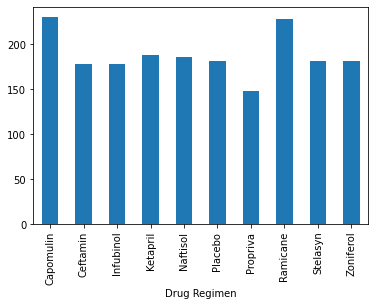

In [130]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = mouse_group['Mouse ID'].count()
drug_count.plot(kind='bar')

plt.ylabel = ("Total Number of Measurements")
plt.title = ("Title")
plt.show()

In [55]:
names = mouse_group['Drug Regimen'].unique()
count = mouse_group['Drug Regimen'].count()

In [49]:
drugs = []
for drug in names:
    drugs.append(drug)

count = []
for x in count:
    count.append(x)

''

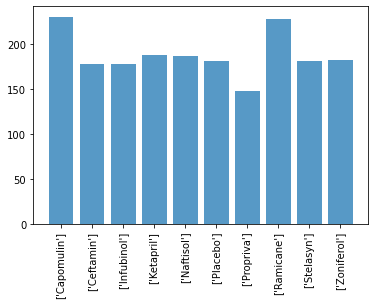

In [70]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.

x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.bar(x_axis, count, alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation = 90)
# plt.xlabel('Drugs')
;

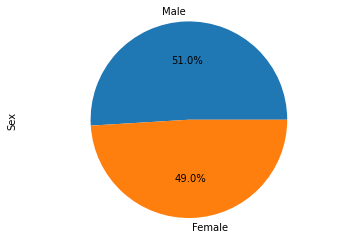

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = clean_complete_data['Sex'].value_counts()
labels = ['Male', 'Female']

sex.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.show()

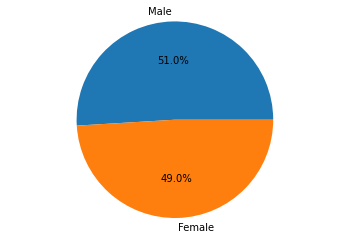

''

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels = labels, autopct="%1.1f%%")
plt.axis("equal")
plt.show()
;

## Quartiles, Outliers and Boxplots

In [131]:
clean_complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [158]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
most_promising = clean_complete_data.loc[(clean_complete_data['Drug Regimen'] == 'Capomulin') | (clean_complete_data['Drug Regimen'] == 'Ramicane') | (clean_complete_data['Drug Regimen'] == 'Infubinol') | (clean_complete_data['Drug Regimen'] == 'Ceftamin')]
most_promising_last_timepoint = most_promising.sort_values(['Timepoint'], ascending = False)
most_promising_last

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
134,r554,Capomulin,Female,8,17,45,32.377357,3
493,a275,Ceftamin,Female,20,28,45,62.999356,3
124,y793,Capomulin,Male,17,17,45,31.896238,2


In [ ]:
most_promi

In [134]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

SyntaxError: unexpected EOF while parsing (<ipython-input-134-c134bffc6a04>, line 6)

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    
    # add subset 
   
    
    # Determine outliers using upper and lower bounds
 

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


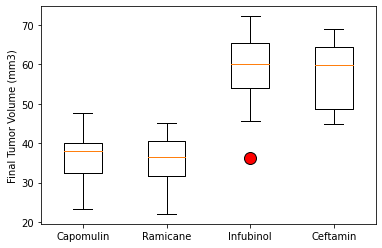

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

''

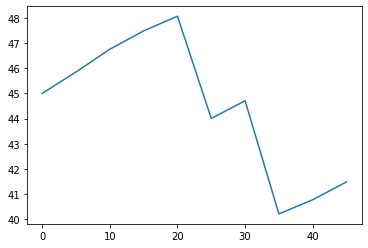

In [208]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_complete_data.loc[clean_complete_data['Drug Regimen'] == "Capomulin", :]
tumor_volume = capomulin.loc[capomulin['Mouse ID'] == 'l509', "Tumor Volume (mm3)"]
timepoint = capomulin.loc[capomulin['Mouse ID'] == 'l509', "Timepoint"]

plt.plot(timepoint, tumor_volume)

# plt.title("Capomulin Treatement for Mouse l509")
# plt.xlabel("Timepoint (days)")
# plt.ylabel("Tumor Volume (mm3)")
# plt.show()
;

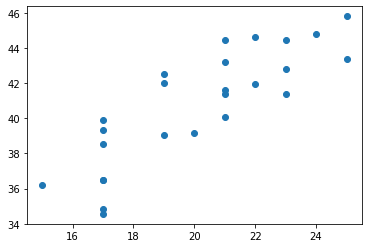

In [213]:
mouse_groups = capomulin.groupby(['Mouse ID'])
weight = mouse_groups['Weight (g)'].mean()
average_volume = mouse_groups["Tumor Volume (mm3)"].mean()

plt.scatter(weight, average_volume)

In [192]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


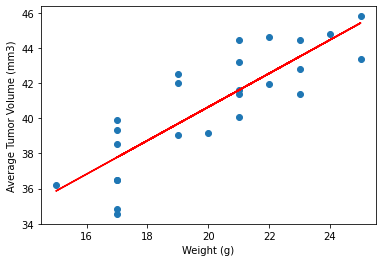

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
